<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_0_8_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_0.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.8_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,84.742650,32.655059,38.057607,-16.266998,149.188318,167.670645,-18.482327
1,0.0,1.0,57.865002,78.600554,34.619300,-14.541002,166.543854,183.836510,-17.292656
2,0.0,2.0,68.132802,27.272754,47.472356,-24.848568,128.029344,150.436987,-22.407642
3,0.0,3.0,50.222759,58.480617,58.857116,27.300983,204.861475,174.594097,30.267378
4,0.0,4.0,91.041814,21.142324,45.536706,1.412041,169.132885,169.251742,-0.118857
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,45.995421,54.256268,73.151666,-22.467989,160.935365,182.180452,-21.245087
59996,999.0,56.0,40.704722,62.423880,73.104312,-18.564341,167.668573,185.856455,-18.187882
59997,999.0,57.0,23.473663,80.976120,31.234749,35.956833,181.641365,138.804070,42.837295
59998,999.0,58.0,83.910633,29.157341,20.518196,-34.910159,108.676011,128.944715,-20.268704


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    84.742650  32.655059  38.057607  ...  149.188318  167.670645 -18.482327
      1.0    57.865002  78.600554  34.619300  ...  166.543854  183.836510 -17.292656
      2.0    68.132802  27.272754  47.472356  ...  128.029344  150.436987 -22.407642
      3.0    50.222759  58.480617  58.857116  ...  204.861475  174.594097  30.267378
      4.0    91.041814  21.142324  45.536706  ...  169.132885  169.251742  -0.118857
...                ...        ...        ...  ...         ...         ...        ...
999.0 55.0   45.995421  54.256268  73.151666  ...  160.935365  182.180452 -21.245087
      56.0   40.704722  62.423880  73.104312  ...  167.668573  185.856455 -18.187882
      57.0   23.473663  80.976120  31.234749  ...  181.641365  138.804070  42.837295
      58.0   83.910633  29.157341  20.518196  ...  108.676011  128.944715 -20.268704
      59.0   23.787798  76.340760  67.327144  ...  173.200289  177.414805  -4.214516

[60000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    84.742650  32.655059  38.057607  ...  149.188318  167.670645 -18.482327
      1.0    57.865002  78.600554  34.619300  ...  166.543854  183.836510 -17.292656
      2.0    68.132802  27.272754  47.472356  ...  128.029344  150.436987 -22.407642
      3.0    50.222759  58.480617  58.857116  ...  204.861475  174.594097  30.267378
      4.0    91.041814  21.142324  45.536706  ...  169.132885  169.251742  -0.118857
...                ...        ...        ...  ...         ...         ...        ...
999.0 55.0   45.995421  54.256268  73.151666  ...  160.935365  182.180452 -21.245087
      56.0   40.704722  62.423880  73.104312  ...  167.668573  185.856455 -18.187882
      57.0   23.473663  80.976120  31.234749  ...  181.641365  138.804070  42.837295
      58.0   83.910633  29.157341  20.518196  ...  108.676011  128.944715 -20.268704
      59.0   23.787798  76.340760  67.327144  ...  173.200289  177.414805  -4.214516

[60000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,84.742650,32.655059,38.057607,-16.266998,149.188318,167.670645,-18.482327
1,0.0,1.0,57.865002,78.600554,34.619300,-14.541002,166.543854,183.836510,-17.292656
2,0.0,2.0,68.132802,27.272754,47.472356,-24.848568,128.029344,150.436987,-22.407642
3,0.0,3.0,50.222759,58.480617,58.857116,27.300983,204.861475,174.594097,30.267378
4,0.0,4.0,91.041814,21.142324,45.536706,1.412041,169.132885,169.251742,-0.118857
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,45.995421,54.256268,73.151666,-22.467989,160.935365,182.180452,-21.245087
59996,999.0,56.0,40.704722,62.423880,73.104312,-18.564341,167.668573,185.856455,-18.187882
59997,999.0,57.0,23.473663,80.976120,31.234749,35.956833,181.641365,138.804070,42.837295
59998,999.0,58.0,83.910633,29.157341,20.518196,-34.910159,108.676011,128.944715,-20.268704


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    84.742650  32.655059  38.057607  ...  149.188318  167.670645 -18.482327
      1.0    57.865002  78.600554  34.619300  ...  166.543854  183.836510 -17.292656
      2.0    68.132802  27.272754  47.472356  ...  128.029344  150.436987 -22.407642
      3.0    50.222759  58.480617  58.857116  ...  204.861475  174.594097  30.267378
      4.0    91.041814  21.142324  45.536706  ...  169.132885  169.251742  -0.118857
...                ...        ...        ...  ...         ...         ...        ...
999.0 55.0   45.995421  54.256268  73.151666  ...  160.935365  182.180452 -21.245087
      56.0   40.704722  62.423880  73.104312  ...  167.668573  185.856455 -18.187882
      57.0   23.473663  80.976120  31.234749  ...  181.641365  138.804070  42.837295
      58.0   83.910633  29.157341  20.518196  ...  108.676011  128.944715 -20.268704
      59.0   23.787798  76.340760  67.327144  ...  173.200289  177.414805  -4.214516

[60000 rows x 7 columns]

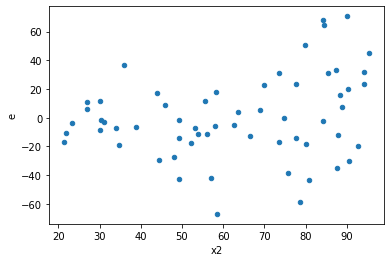

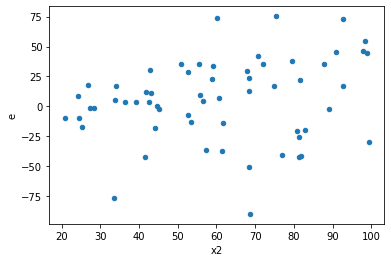

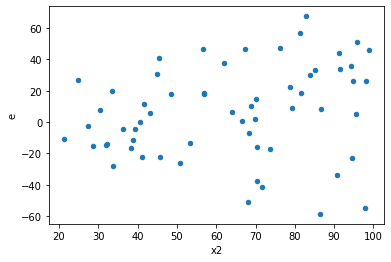

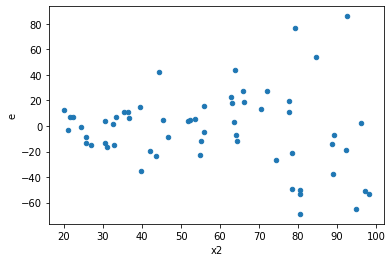

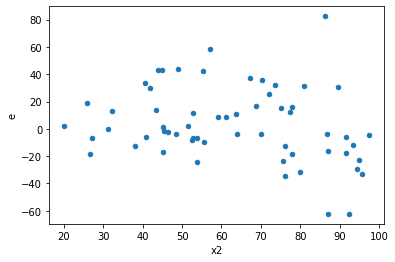

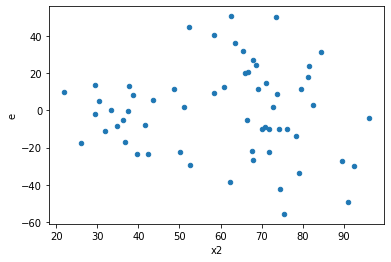

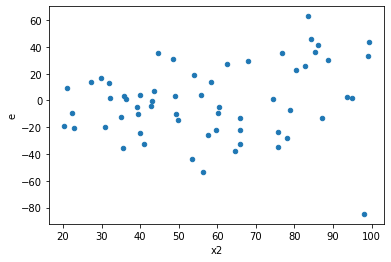

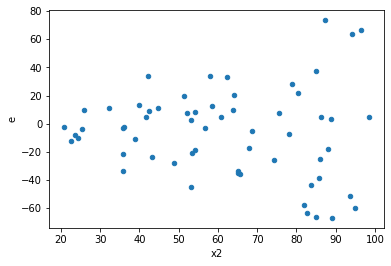

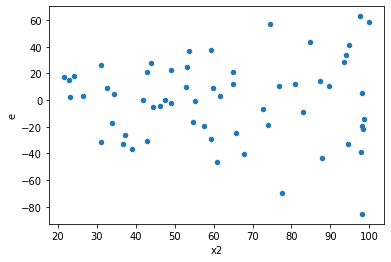

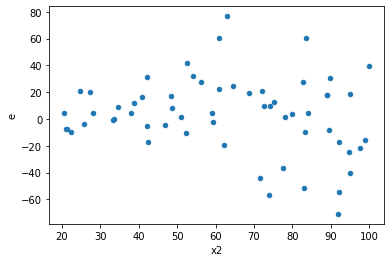

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]
    k_means = KMeans(n_clusters=2)
    model = k_means.fit(x)
    model

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = k_means.predict(x)
    y_kmeans

    # kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    data_sort_clusters = data_clusters.sort_values('clusters')
    data_sort_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster1 = data_sort_clusters[data_sort_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSR1 = model1.ssr
    MSE1 = model1.mse_resid

    # กลุ่มที่ 2
    data_cluster0 = data_sort_clusters[data_sort_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model0 = sm.OLS(y, x).fit()

    DF0 = model0.df_resid + 1
    SSR0 = model0.ssr
    MSE0 = model0.mse_resid

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSR1/DF1) / (SSR0/DF0)

    df1 = DF1
    df0 = DF0

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df0)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df0)
    
    return df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df0=[]
list_df1=[]
list_SSR0=[]
list_SSR1=[]
list_MSE0=[]
list_MSE1=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater=get_result(run_replicate)

    list_df0.append(df0)
    list_df1.append(df1)
    list_SSR0.append(SSR0)
    list_SSR1.append(SSR1)
    list_MSE0.append(MSE0)
    list_MSE1.append(MSE1)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
2.0,22.0,32.0,6193.366046301773,39788.139283507306,294.9221926810368,1283.4883639841066,4.4167171055141,0.0005756226032553879,0.9997121886983723,Reject005=0 : Heteroscedasticity
5.0,34.0,20.0,25147.606254580005,15708.22226348328,762.0486743812123,826.7485401833305,1.0618894529199223,0.8538135669641389,0.5730932165179305,Reject005=1 : Homoscedasticity
6.0,29.0,25.0,13049.780734363925,21154.15470445034,466.0635976558545,881.4231126854307,1.8804009014913512,0.10311662497433471,0.9484416875128326,Reject005=1 : Homoscedasticity
8.0,25.0,29.0,2903.188822510604,23900.14128540204,120.96620093794184,853.5764744786442,7.0968756540626945,4.233006668963313e-06,0.9999978834966655,Reject005=0 : Heteroscedasticity
10.0,30.0,24.0,19883.17341408037,23516.719420056856,685.6266694510473,1022.4660617416024,1.478430965866556,0.30836077505940174,0.8458196124702991,Reject005=1 : Homoscedasticity
13.0,25.0,29.0,6676.988782089886,42127.302554352835,278.2078659204119,1504.5465197983156,5.43907460657673,5.272101255560102e-05,0.9999736394937222,Reject005=0 : Heteroscedasticity
15.0,27.0,27.0,10052.300107512994,21960.19710379216,386.62692721203825,844.6229655304677,2.184594258917849,0.0469230533721996,0.9765384733139002,Reject005=0 : Heteroscedasticity
18.0,31.0,23.0,25875.84198499135,21250.764994321868,862.5280661663784,965.9438633782667,1.1069141419144064,0.7806454635770383,0.6096772682114808,Reject005=1 : Homoscedasticity
19.0,24.0,30.0,7758.773477863569,31857.616622043683,337.33797729841604,1098.5385042084029,3.28480956047356,0.003883922724248423,0.9980580386378758,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,33.0,21.0,22798.008511353357,4844.869527205029,712.4377659797924,242.24347636025146,0.33394874802780156,0.010376494215971135,Reject005=0 : Heteroscedasticity
1.0,29.0,25.0,29377.04507052036,18172.876223952597,1049.1801810900129,757.2031759980249,0.7175853245001544,0.4026099980505322,Reject005=1 : Homoscedasticity
2.0,22.0,32.0,6193.366046301773,39788.139283507306,294.9221926810368,1283.4883639841066,4.4167171055141,0.0005756226032553879,Reject005=0 : Heteroscedasticity
3.0,24.0,30.0,17629.000697833308,9633.371959816513,766.4782912101438,332.1852399936729,0.43716020550163137,0.0328612401132745,Reject005=0 : Heteroscedasticity
4.0,33.0,21.0,25736.65417193133,14142.050302683365,804.2704428728541,707.1025151341682,0.8634852749606279,0.7362930120828131,Reject005=1 : Homoscedasticity
5.0,34.0,20.0,25147.606254580005,15708.22226348328,762.0486743812123,826.7485401833305,1.0618894529199223,1.146186433035861,Reject005=1 : Homoscedasticity
6.0,29.0,25.0,13049.780734363925,21154.15470445034,466.0635976558545,881.4231126854307,1.8804009014913512,0.10311662497433471,Reject005=1 : Homoscedasticity
7.0,34.0,20.0,20275.616794901925,5697.532308719446,614.4126301485431,299.87012151154977,0.4777070420495639,0.08393932574474837,Reject005=1 : Homoscedasticity
8.0,25.0,29.0,2903.188822510604,23900.14128540204,120.96620093794184,853.5764744786442,7.0968756540626945,4.233006668963313e-06,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      655
Reject005=0 : Heteroscedasticity    345
Name: Result_test, dtype: int64